## 9.4 Moving average models
Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model,
$$
y_t = c + \epsilon_t + \theta_1\epsilon_{t-1} +\theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q}, 
$$
where $\epsilon_t$ is white noise. We refer to this as an **MA(q) model**, a moving average model of order $q$. 

Notice that each value of $y_t$ can be thought of as a weighted moving average of the past few forecast errors (although the coefficients will not normally sum to one). However, moving average models should not be confused with the moving average smoothing we discussed in Chapter 3. A moving average model is used for forecasting future values, while moving average smoothing is used for estimating the trend-cycle of past values.

In [2]:
import sys
sys.path.append('..')
from utils import *

In [3]:
def MA(c=0, theta=None, order=1, n_iter=100):
    assert len(theta) == order, "Order of the MA regression must equal the number of parameters."
    errors = list(np.random.rand(order))
    results = np.zeros(n_iter-order)
    for i in range(n_iter-order):
        curr_error = np.random.rand()
        y = np.array(theta).dot(errors[-order:][::-1]) + curr_error + c
        errors.append(curr_error)
        results[i] = y
    return results

In [4]:
y_ma1 = MA(c=20, theta=[0.8], order=1, n_iter=100)
y_ma2 = MA(c=0, theta=[-1, 0.8], order=2, n_iter=100)

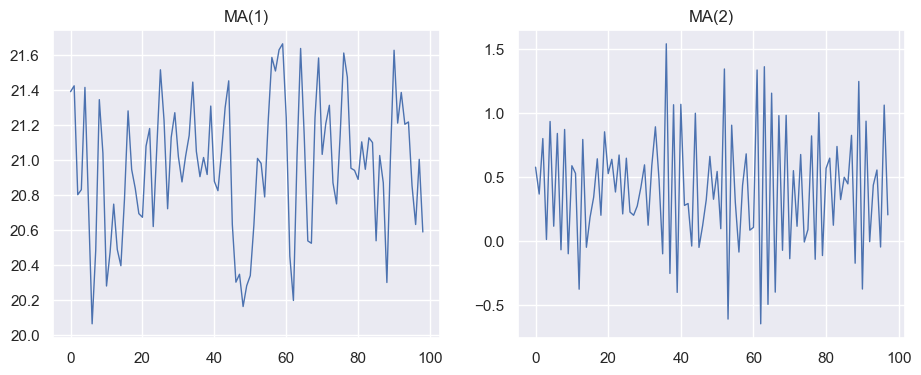

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
axes[0].plot(y_ma1)
axes[0].set(title='MA(1)')
axes[1].plot(y_ma2)
axes[1].set(title='MA(2)');